# **Описание задачи импорт и загрузка**
# **ник feelness**



In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

In [94]:
data = pd.read_csv('chocolate_train.csv')

In [91]:

data.head()
# Company - компания производитель
# Specific Bean Origin - географический регион происхождения
# REF - параметр, определяющий момент внесения записи в базу данных (чем выше значение, тем "свежее" запись)
# Review - дата публикации отзыва
# Cocoa Percent - процентное содержание какао
# Company Location - страна производитель
# Rating - экспертный рейтинг
# Bean Type - используемый сорт какао-бобов, если таковой имеется
# Broad Bean Origin - географический регион происхождения какао-бобов

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia


In [4]:
data.corr()

,REF,Review,Rating
REF,1.000000,0.984938,0.112792
Review,0.984938,1.000000,0.111826
Rating,0.112792,0.111826,1.000000


In [5]:
data.isnull().sum()

Company                 0
Specific Bean Origin    0
REF                     0
Review                  0
Cocoa Percent           0
Company Location        0
Rating                  0
Bean Type               1
Broad Bean Origin       1
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1255 non-null   object 
 1   Specific Bean Origin  1255 non-null   object 
 2   REF                   1255 non-null   int64  
 3   Review                1255 non-null   int64  
 4   Cocoa Percent         1255 non-null   object 
 5   Company Location      1255 non-null   object 
 6   Rating                1255 non-null   float64
 7   Bean Type             1254 non-null   object 
 8   Broad Bean Origin     1254 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.4+ KB


In [95]:
X = data.drop('Rating', axis=1)
y = data['Rating']
X = X.drop(['Bean Type', 'Broad Bean Origin'], axis=1)

In [96]:
X.shape

(1255, 6)

In [97]:
X.describe(include=object)

,Company,Specific Bean Origin,Cocoa Percent,Company Location
count,1255,1255,1255,1255
unique,376,762,40,58
top,Soma,Madagascar,70%,U.S.A.
freq,35,39,461,521


In [98]:
X['Cocoa Percent'] = X['Cocoa Percent'].apply(lambda x: x.replace('%', ''))

In [99]:
X['Cocoa Percent'] = X['Cocoa Percent'].astype(float)

In [100]:
X

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location
0,Willie's Cacao,Rio Caribe,457,2009,72.0,U.K.
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72.0,Switzerland
2,Dark Forest,Tanzania,1554,2015,70.0,U.S.A.
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72.0,U.S.A.
4,Pralus,"Java, Indonesie",32,2006,75.0,France
...,...,...,...,...,...,...
1250,Artisan du Chocolat,Madagascar,363,2009,80.0,U.K.
1251,Marana,Cusco,1884,2016,70.0,Peru
1252,Arete,Nacional,1534,2015,68.0,U.S.A.
1253,Fresco,"Conacado, #212, LR, SC",642,2011,72.0,U.S.A.


In [13]:
pip install  association_metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3928 sha256=e7a2dc357a2b8005c91134429ab04d4b22343a36cb8ef324ca3ce7cfff49a662
  Stored in directory: /home/fltww/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association_metrics
Note: you may need to restart the kernel to use updated packages.


In [101]:
import association_metrics as am

XC = X.apply(lambda x : x.astype('category') if x.dtype == object else x)

cramerSV = am.CramersV(XC)
cramerSV.fit()

,Company,Specific Bean Origin,Company Location
Company,1.000000,0.771074,0.999651
Specific Bean Origin,0.771074,1.000000,0.808500
Company Location,0.999651,0.808500,1.000000


In [102]:
X.isnull().sum()

Company                 0
Specific Bean Origin    0
REF                     0
Review                  0
Cocoa Percent           0
Company Location        0
dtype: int64

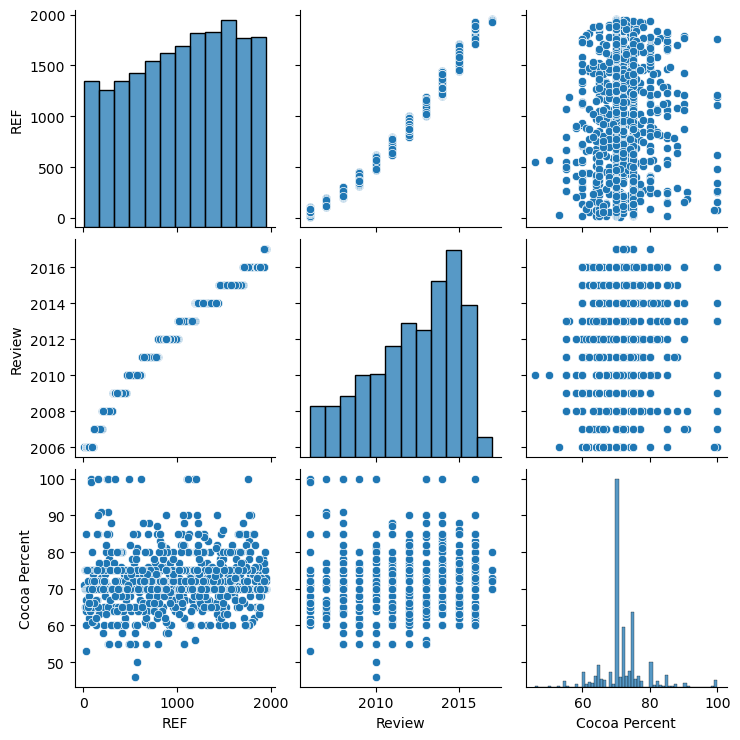

In [103]:
sns.pairplot(data=X)

In [105]:
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

cat_cols = X.select_dtypes(include=object).astype('category')

pipe = Pipeline([
    ('encoder',  TargetEncoder(cols=cat_cols)),
    ('scaler', StandardScaler()),
    ('feature', PolynomialFeatures(degree=2))
])

pipe1 = Pipeline([
    ('encoder',  TargetEncoder(cols=cat_cols, smoothing=10)),
    ('scaler', StandardScaler()),
    ('feature', PolynomialFeatures(degree=2))
])

pipe2 = Pipeline([
    ('encoder',  LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler', StandardScaler()),
    ('feature', PolynomialFeatures(degree=2))
])

pipes = [pipe, pipe1, pipe2]



In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
def obj(trial):
    for pipe in pipes:

        Xtrain = pipe.fit_transform(X_train, y_train)
        Xtest = pipe.transform(X_test)
        
        params = {
            'n_estimators': trial.suggest_int('n_estimators',90, 250),
            'max_features' : trial.suggest_categorical('max_features',['auto', 'log2', 'sqrt'])
        }
    
        model = RandomForestRegressor(**params, n_jobs=-1)
        model.fit(Xtrain, y_train)
        
        r2 = r2_score(y_test, model.predict(Xtest))
        print(pipe)
        return r2
study1 = optuna.create_study(direction='maximize')
study1.optimize(obj, n_trials=25)
    
print(study1.best_params)
print(study1.best_value)

[I 2024-09-10 22:01:49,164] A new study created in memory with name: no-name-76b08c74-a87a-4c5d-a033-bc5e96fac360
[I 2024-09-10 22:01:49,960] Trial 0 finished with value: 0.13045026979714136 and parameters: {'n_estimators': 185, 'max_features': 'log2'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:50,871] Trial 1 finished with value: 0.11072478823425813 and parameters: {'n_estimators': 234, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:51,776] Trial 2 finished with value: 0.10649311788416538 and parameters: {'n_estimators': 230, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:52,837] Trial 3 finished with value: 0.12810797321724565 and parameters: {'n_estimators': 243, 'max_features': 'log2'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:53,748] Trial 4 finished with value: 0.11827950648943819 and parameters: {'n_estimators': 242, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:54,414] Trial 5 finished with value: 0.08498363102434403 and parameters: {'n_estimators': 135, 'max_features': 'auto'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:55,083] Trial 6 finished with value: 0.06774410404307729 and parameters: {'n_estimators': 112, 'max_features': 'auto'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:55,647] Trial 7 finished with value: 0.06810454550819678 and parameters: {'n_estimators': 99, 'max_features': 'auto'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:56,547] Trial 8 finished with value: 0.08345113745583144 and parameters: {'n_estimators': 209, 'max_features': 'auto'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:57,465] Trial 9 finished with value: 0.11825822126232033 and parameters: {'n_estimators': 219, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:58,265] Trial 10 finished with value: 0.11681892153711904 and parameters: {'n_estimators': 179, 'max_features': 'log2'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:59,119] Trial 11 finished with value: 0.12397190909330003 and parameters: {'n_estimators': 173, 'max_features': 'log2'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:01:59,930] Trial 12 finished with value: 0.11771467950069969 and parameters: {'n_estimators': 191, 'max_features': 'log2'}. Best is trial 0 with value: 0.13045026979714136.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:00,755] Trial 13 finished with value: 0.13514453683517624 and parameters: {'n_estimators': 142, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:01,441] Trial 14 finished with value: 0.1299638620344542 and parameters: {'n_estimators': 141, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:02,248] Trial 15 finished with value: 0.11345042689923845 and parameters: {'n_estimators': 152, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:03,069] Trial 16 finished with value: 0.11475563481469409 and parameters: {'n_estimators': 198, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:03,843] Trial 17 finished with value: 0.13019352113395488 and parameters: {'n_estimators': 153, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:04,549] Trial 18 finished with value: 0.10899809613481304 and parameters: {'n_estimators': 124, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:05,336] Trial 19 finished with value: 0.12847359828404759 and parameters: {'n_estimators': 161, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:06,178] Trial 20 finished with value: 0.11574978738779484 and parameters: {'n_estimators': 186, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:07,003] Trial 21 finished with value: 0.12250623439238906 and parameters: {'n_estimators': 159, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:07,714] Trial 22 finished with value: 0.10133512436153247 and parameters: {'n_estimators': 136, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:08,516] Trial 23 finished with value: 0.10662310223750049 and parameters: {'n_estimators': 148, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

[I 2024-09-10 22:02:09,328] Trial 24 finished with value: 0.11943975459023026 and parameters: {'n_estimators': 167, 'max_features': 'log2'}. Best is trial 13 with value: 0.13514453683517624.


Pipeline(steps=[('encoder',
                 TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212, LR, SC   
1254                         Zak's                 Madagascar, Batch 2   

     Company Location  
0                U.K.  

In [109]:
model_rf = RandomForestRegressor(n_estimators=105, max_features='log2')

X_train_rf = pipe.fit_transform(X_train, y_train)
X_test_rf = pipe.transform(X_test)

model_rf.fit(X_train_rf, y_train)

print(r2_score(y_test, model_rf.predict(X_test_rf)))

0.11146165457231394


In [110]:


def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations',500, 1500),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth' : trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg' : trial.suggest_int('l2_leaf_reg', 1, 9)
    }
    
    model = CatBoostRegressor(**params, verbose=0)
    model.fit(X_train, y_train, cat_features=list(cat_cols.columns.astype('category')))

    r2 = r2_score(y_test, model.predict(X_test))
    return r2
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials=25)
    
print(study2.best_params)
print(study2.best_value)

[I 2024-09-10 22:03:36,559] A new study created in memory with name: no-name-430d78dc-4a7d-467a-b599-f2bd5aae03e0
[I 2024-09-10 22:03:38,200] Trial 0 finished with value: 0.19156806008568428 and parameters: {'iterations': 637, 'learning_rate': 0.02065071768959749, 'depth': 8, 'l2_leaf_reg': 5}. Best is trial 0 with value: 0.19156806008568428.
[I 2024-09-10 22:03:39,888] Trial 1 finished with value: 0.1843324488166106 and parameters: {'iterations': 1248, 'learning_rate': 0.060166232688068394, 'depth': 6, 'l2_leaf_reg': 6}. Best is trial 0 with value: 0.19156806008568428.
[I 2024-09-10 22:03:44,353] Trial 2 finished with value: 0.16958758133734753 and parameters: {'iterations': 1046, 'learning_rate': 0.041457608049648154, 'depth': 9, 'l2_leaf_reg': 7}. Best is trial 0 with value: 0.19156806008568428.
[I 2024-09-10 22:03:45,368] Trial 3 finished with value: 0.18559605238828714 and parameters: {'iterations': 673, 'learning_rate': 0.059398518455189835, 'depth': 6, 'l2_leaf_reg': 2}. Best is

{'iterations': 1344, 'learning_rate': 0.02737019139039592, 'depth': 6, 'l2_leaf_reg': 8}
0.21031020941523637


In [119]:
model = CatBoostRegressor(**study2.best_params, verbose=0)
model.fit(X_train, y_train, cat_features=list(cat_cols.columns.astype('category')))

predict_catboost = model.predict(X_test)

r2_cat_boost = r2_score(y_test, predict_catboost)
r2_cat_boost
    

0.21031020941523637

In [112]:
from sklearn.ensemble import StackingRegressor
pipe_rf = Pipeline([
    ('encoder',  TargetEncoder(cols=cat_cols)),
    ('scaler', StandardScaler()),
    ('feature', PolynomialFeatures(degree=2)),
    ('model', RandomForestRegressor(n_estimators=105, max_features='log2', n_jobs=-1))
])

pipe_cb = Pipeline([
    ('model', CatBoostRegressor(**study2.best_params, cat_features=list(cat_cols.columns.astype('category')), silent=True))
])
estimators = [
    ('rf', pipe_rf),
    ('cb', pipe_cb)
]

stack = StackingRegressor(
    estimators=estimators, final_estimator=CatBoostRegressor(**study2.best_params)
)

stack.fit(X_train, y_train)

0:	learn: 0.4693489	total: 2ms	remaining: 2.69s
1:	learn: 0.4677771	total: 4.11ms	remaining: 2.76s
2:	learn: 0.4664614	total: 5.47ms	remaining: 2.44s
3:	learn: 0.4649126	total: 6.85ms	remaining: 2.29s
4:	learn: 0.4633020	total: 8.18ms	remaining: 2.19s
5:	learn: 0.4618067	total: 9.38ms	remaining: 2.09s
6:	learn: 0.4603695	total: 10.7ms	remaining: 2.04s
7:	learn: 0.4589888	total: 11.8ms	remaining: 1.97s
8:	learn: 0.4577153	total: 12.6ms	remaining: 1.86s
9:	learn: 0.4564687	total: 13.3ms	remaining: 1.78s
10:	learn: 0.4553025	total: 13.8ms	remaining: 1.68s
11:	learn: 0.4540069	total: 14.4ms	remaining: 1.59s
12:	learn: 0.4528923	total: 14.9ms	remaining: 1.52s
13:	learn: 0.4518391	total: 15.5ms	remaining: 1.47s
14:	learn: 0.4507932	total: 16ms	remaining: 1.42s
15:	learn: 0.4496358	total: 16.5ms	remaining: 1.37s
16:	learn: 0.4486707	total: 17ms	remaining: 1.33s
17:	learn: 0.4475729	total: 17.6ms	remaining: 1.29s
18:	learn: 0.4467676	total: 18.1ms	remaining: 1.26s
19:	learn: 0.4459483	total: 1

332:	learn: 0.4019844	total: 185ms	remaining: 562ms
333:	learn: 0.4019122	total: 186ms	remaining: 562ms
334:	learn: 0.4018685	total: 186ms	remaining: 561ms
335:	learn: 0.4017916	total: 187ms	remaining: 561ms
336:	learn: 0.4016873	total: 188ms	remaining: 560ms
337:	learn: 0.4016269	total: 188ms	remaining: 560ms
338:	learn: 0.4015379	total: 189ms	remaining: 559ms
339:	learn: 0.4014519	total: 189ms	remaining: 558ms
340:	learn: 0.4014147	total: 190ms	remaining: 558ms
341:	learn: 0.4013688	total: 190ms	remaining: 557ms
342:	learn: 0.4013328	total: 191ms	remaining: 557ms
343:	learn: 0.4013044	total: 192ms	remaining: 557ms
344:	learn: 0.4012794	total: 192ms	remaining: 557ms
345:	learn: 0.4012296	total: 193ms	remaining: 556ms
346:	learn: 0.4011721	total: 193ms	remaining: 555ms
347:	learn: 0.4011454	total: 194ms	remaining: 555ms
348:	learn: 0.4011093	total: 194ms	remaining: 554ms
349:	learn: 0.4010325	total: 195ms	remaining: 554ms
350:	learn: 0.4010072	total: 196ms	remaining: 553ms
351:	learn: 

650:	learn: 0.3819932	total: 365ms	remaining: 389ms
651:	learn: 0.3818810	total: 366ms	remaining: 388ms
652:	learn: 0.3818457	total: 367ms	remaining: 388ms
653:	learn: 0.3817907	total: 367ms	remaining: 387ms
654:	learn: 0.3817350	total: 368ms	remaining: 387ms
655:	learn: 0.3816295	total: 368ms	remaining: 386ms
656:	learn: 0.3815488	total: 369ms	remaining: 386ms
657:	learn: 0.3815054	total: 369ms	remaining: 385ms
658:	learn: 0.3814018	total: 370ms	remaining: 384ms
659:	learn: 0.3813440	total: 370ms	remaining: 384ms
660:	learn: 0.3813107	total: 371ms	remaining: 383ms
661:	learn: 0.3812935	total: 372ms	remaining: 383ms
662:	learn: 0.3812551	total: 372ms	remaining: 382ms
663:	learn: 0.3811362	total: 373ms	remaining: 382ms
664:	learn: 0.3810894	total: 374ms	remaining: 381ms
665:	learn: 0.3809590	total: 374ms	remaining: 381ms
666:	learn: 0.3808220	total: 375ms	remaining: 380ms
667:	learn: 0.3808072	total: 375ms	remaining: 380ms
668:	learn: 0.3807667	total: 376ms	remaining: 379ms
669:	learn: 

981:	learn: 0.3617442	total: 548ms	remaining: 202ms
982:	learn: 0.3617120	total: 549ms	remaining: 201ms
983:	learn: 0.3616455	total: 549ms	remaining: 201ms
984:	learn: 0.3616097	total: 550ms	remaining: 200ms
985:	learn: 0.3616018	total: 550ms	remaining: 200ms
986:	learn: 0.3615777	total: 551ms	remaining: 199ms
987:	learn: 0.3615440	total: 552ms	remaining: 199ms
988:	learn: 0.3615186	total: 552ms	remaining: 198ms
989:	learn: 0.3614591	total: 553ms	remaining: 198ms
990:	learn: 0.3614358	total: 554ms	remaining: 197ms
991:	learn: 0.3613593	total: 554ms	remaining: 197ms
992:	learn: 0.3613176	total: 555ms	remaining: 196ms
993:	learn: 0.3612832	total: 556ms	remaining: 196ms
994:	learn: 0.3611894	total: 556ms	remaining: 195ms
995:	learn: 0.3611190	total: 557ms	remaining: 194ms
996:	learn: 0.3611107	total: 557ms	remaining: 194ms
997:	learn: 0.3610757	total: 558ms	remaining: 193ms
998:	learn: 0.3610704	total: 558ms	remaining: 193ms
999:	learn: 0.3609847	total: 559ms	remaining: 192ms
1000:	learn:

1287:	learn: 0.3477690	total: 731ms	remaining: 31.8ms
1288:	learn: 0.3476932	total: 732ms	remaining: 31.2ms
1289:	learn: 0.3476803	total: 733ms	remaining: 30.7ms
1290:	learn: 0.3476730	total: 733ms	remaining: 30.1ms
1291:	learn: 0.3476000	total: 734ms	remaining: 29.5ms
1292:	learn: 0.3475429	total: 735ms	remaining: 29ms
1293:	learn: 0.3474946	total: 735ms	remaining: 28.4ms
1294:	learn: 0.3474585	total: 736ms	remaining: 27.8ms
1295:	learn: 0.3473980	total: 737ms	remaining: 27.3ms
1296:	learn: 0.3473220	total: 737ms	remaining: 26.7ms
1297:	learn: 0.3472795	total: 738ms	remaining: 26.1ms
1298:	learn: 0.3472261	total: 738ms	remaining: 25.6ms
1299:	learn: 0.3471549	total: 739ms	remaining: 25ms
1300:	learn: 0.3470758	total: 739ms	remaining: 24.4ms
1301:	learn: 0.3470539	total: 740ms	remaining: 23.9ms
1302:	learn: 0.3469953	total: 740ms	remaining: 23.3ms
1303:	learn: 0.3469597	total: 741ms	remaining: 22.7ms
1304:	learn: 0.3469491	total: 741ms	remaining: 22.2ms
1305:	learn: 0.3469317	total: 74

StackingRegressor(estimators=[('rf',
                               Pipeline(steps=[('encoder',
                                                TargetEncoder(cols=                           Company                Specific Bean Origin  \
0                   Willie's Cacao                          Rio Caribe   
1               Beschle (Felchlin)  Ocumare, Premier Cru, Quizas No. 2   
2                      Dark Forest                            Tanzania   
3     Brasstown aka It's Chocolate                          Cooproagro   
4                           Pralus                     Java, Indonesie   
...                            ...                                 ...   
1250           Artisan du Chocolat                          Madagascar   
1251                        Marana                               Cusco   
1252                         Arete                            Nacional   
1253                        Fresco              Conacado, #212,...
1253           U.S.A.  
1254  

In [113]:
pred_stack = stack.predict(X_test)

In [114]:
r2_score(y_test, pred_stack)

0.19183265924805515